# Introduction

The below project serves as my first independent data analysis project (i.e., not prompted by Codecademy) involving Python, Pandas, and Matplotlib. I aim to answer a few questions about characters (hereafter referred to Pokemon) in the Pokemon series of games. More specifically, I would like to know:

1. Which Pokemon are the hardest and the easiest to capture?
2. How many Pokemon of each classification are there?
3. How many legendary Pokemon are there, and how hard are they to capture?
4. How many Pokemon of each (primary) type are there?
5. Of Pokemon with gender, do predominantly male Pokemon have significantly different heights and weights than predominantly female Pokemon?
6. Are base attack, base defense, and base health (HP) correlated pairwise?
7. If one wanted Pokemon that aren't "too hard" to capture, and which have high HP/base attack/base defense, which one(s) should one target?

I ended up answering another couple of questions as well, when they came up as a result of my analysis.

I was drawn to this data set as a first independent data analysis project for three reasons. First, it is a relatively small data set of 801 rows, so it won't be computationally intensive to analyze, and if needs be it is easy to consult with the original .csv file to double-check results. Second, even though I did not play Pokemon games as a child, I now play the Pokemon Go game on occasion, so it would be interesting to gain some basic game knowledge through analysis of a Pokemon data set. And last, the Kaggle user who compiled this data set released it into the public domain (see Credits at the end of this notebook), and I wanted to get my start on independent projects with data that had been released into the public domain.

First things first: Let's import some of the packages we'll need to analyze this data set:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now let's import the data as a Pandas DataFrame and see what we're dealing with:

In [2]:
pokemon = pd.read_csv('pokemon.csv')

print(pokemon.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

That's a lot of columns! Looks like we have a list of names (in Japanese and English), abilities, how those abilities do against various Pokemon types (either in terms of attack or defense, not sure which from the column titles), base attack and defense, capture rate, health points, and a whole host of other stuff. Let's first make sure that the list is sorted by Pokedex number (just in case it isn't already):

In [3]:
pokemon.sort_values(by = 'pokedex_number', inplace = True)

Let's see if this Pokedex numbering matches the numbering in Pokemon Go. I happen to know that Bulbasaur is the first Pokemon in that Pokedex. 

In [4]:
print(pokemon.name[0])

Bulbasaur


Ah! It does! That is good news, as I have some familiarity with the Pokemon Go Pokedex. (Upon further thought, the Pokedex numbering used here may be universal; the Pokedex of Pokemon Go is missing quite a number of Pokedex entries, but the entries it does have line up with what is in the file.)

# Question #1: Hardest to Catch Pokemon

With this settled, let me ask the first burning question I had when looking at this data set: What are the hardest Pokemon to capture, and how many of those do I have? And while we're at it, let's ask the converse: What are the easiest Pokemon to capture, and how many of those do I have?

Rather than type out a list of all the Pokemon I have in my Pokemon Go Pokedex, why don't I make a different file, based on the one I got, saying whether or not I have that particular Pokemon. (The original data set was released into the public domain according the the Creative Commons Public Domain license; see Credits below.)  I'll call the file 'MAC_pokemon.csv' and I will import it here:

In [5]:
mac_pokemon = pd.read_csv('MAC_pokemon.csv')

print(mac_pokemon.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   pokedex_number  801 non-null    int64 
 1   name            801 non-null    object
 2   is_one_of_mine  801 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 18.9+ KB
None


Keeping a separate file of my Pokemon not only saves me from a lot of typing, but also makes it easier to update as I catch more Pokemon.

Anyway, before I look at my Pokemon specifically, let's look at all Pokemon in the Pokedex. Which ones are hardest to get?

According to https://bulbapedia.bulbagarden.net/wiki/Catch_rate, higher capture rates mean that a Pokemon is easier to catch, up to a maximum of 255. First I need to convert the capture_rate column to a number:

In [6]:
# One entry in this column is causing an issue, hence why this column was an "object" in the original data table
# rather than an int64. Let's see what the problem child is:

print(pokemon.capture_rate[773])
# Here's what is listed for this Pokemon in the "capture_rate" column:
# 30 (Meteorite)255 (Core)
# To be honest, I don't really know what to do about this one. Let's just go with the average of the two capture rates
# (143) until I think of something better to do.
pokemon.loc[773,'capture_rate'] = '143'

pokemon.capture_rate = pd.to_numeric(pokemon.capture_rate)

30 (Meteorite)255 (Core)


 With this kludge done, let's get the maximum and minimum capture rates (the maximum possible is 255, so I will probably see that as the maximum):

In [7]:
print(min(pokemon.capture_rate), max(pokemon.capture_rate))

3 255


Let's operationally define "hard to catch" as a Pokemon having a capture rate of 30 or below. And let's operationally define "easy to catch" as a Pokemon having a capture rate of 225 or above. With this in mind, let's get some information about the hardest and easiest to catch Pokemon from the whole data set:

In [8]:
hard_to_catch_pokemon = pokemon[pokemon.capture_rate <= 30]
print(len(hard_to_catch_pokemon))
print(hard_to_catch_pokemon.name.unique())

easy_to_catch_pokemon = pokemon[pokemon.capture_rate >= 225]
print(len(easy_to_catch_pokemon))
print(easy_to_catch_pokemon.name.unique())

93
['Clefable' 'Chansey' 'Snorlax' 'Articuno' 'Zapdos' 'Moltres' 'Mewtwo'
 'Murkrow' 'Steelix' 'Scizor' 'Mantine' 'Skarmory' 'Blissey' 'Raikou'
 'Entei' 'Suicune' 'Lugia' 'Ho-Oh' 'Absol' 'Relicanth' 'Beldum' 'Metang'
 'Metagross' 'Regirock' 'Regice' 'Registeel' 'Latias' 'Latios' 'Kyogre'
 'Groudon' 'Jirachi' 'Deoxys' 'Honchkrow' 'Chatot' 'Mantyke' 'Magnezone'
 'Lickilicky' 'Rhyperior' 'Tangrowth' 'Electivire' 'Magmortar' 'Togekiss'
 'Yanmega' 'Gliscor' 'Porygon-Z' 'Uxie' 'Mesprit' 'Azelf' 'Dialga'
 'Palkia' 'Heatran' 'Regigigas' 'Giratina' 'Cresselia' 'Phione' 'Manaphy'
 'Darkrai' 'Arceus' 'Victini' 'Basculin' 'Klinklang' 'Eelektross'
 'Cryogonal' 'Volcarona' 'Cobalion' 'Terrakion' 'Virizion' 'Tornadus'
 'Thundurus' 'Reshiram' 'Zekrom' 'Landorus' 'Kyurem' 'Keldeo' 'Meloetta'
 'Genesect' 'Zygarde' 'Diancie' 'Hoopa' 'Volcanion' 'Type: Null'
 'Silvally' 'Dhelmise' 'Tapu Koko' 'Tapu Lele' 'Tapu Bulu' 'Tapu Fini'
 'Buzzwole' 'Xurkitree' 'Celesteela' 'Guzzlord' 'Necrozma' 'Magearna']
91
['Ca

I had to check for a moment on that "Type: Null" Pokemon, given that I am working in Python here, but as it turns out that is the creature's English name (https://bulbapedia.bulbagarden.net/wiki/Type:_Null_(Pok%C3%A9mon)) Looking at the rest of the hard-to-catch list, I don't recognize very many names, but looking at the list of easy to catch Pokemon names I can see that I've found a lot of easy to catch Pokemon. This probably shouldn't come as a surprise to me, but is a bit of a blow to my ball-throwing skill ego.

Now let's finally get around to the burning question: How many of the hardest to capture Pokemon do I have? From the list of hardest to catch Pokemon names, it looks like I might only have one or two, which admittedly makes me a little sad. But let's do this properly, if only to find out which of the Pokemon I have was hardest to catch. We'll need to do a union between my data set and the full one; fortunately, I can do this on Pokedex number, because there is a unique Pokemon in each Pokedex slot. (It's kind of the primary key for Pokemon ordering.)

In [9]:
mac_pokemon_all_info = pd.merge(pokemon, mac_pokemon, left_on = 'pokedex_number', right_on = 'pokedex_number', \
                                suffixes = ['_all', '_mac'])

mac_pokemon_all_info = mac_pokemon_all_info[mac_pokemon_all_info.is_one_of_mine == 1]

print(len(mac_pokemon_all_info))

125


Hmm. That's more Pokemon than I thought I had! Which were the hardest to catch?

In [10]:
mac_hard_to_get_pokemon = mac_pokemon_all_info[mac_pokemon_all_info.capture_rate <= 30]
print(len(mac_hard_to_get_pokemon))
print(mac_hard_to_get_pokemon.name_mac.unique())

3
['Murkrow' 'Skarmory' 'Beldum']


OK, the Skarmory I can get; it's a top-of-the-evolution-chain Pokemon and it flies, which tends to make Pokemon harder to get. But the Murkrow? I don't get why that is so hard to catch given that it can evolve into something else. The Beldum I hatched from an egg, so I suppose I got lucky in what the egg-hatching algorithm decided to award me there.

Well, anyway, those are my hard-to-get Pokemon. How many of the easiest Pokemon to get do I have?

In [11]:
mac_easy_to_get_pokemon = mac_pokemon_all_info[mac_pokemon_all_info.capture_rate >=225]
print(len(mac_easy_to_get_pokemon))
print(mac_easy_to_get_pokemon.name_mac.unique())

47
['Caterpie' 'Weedle' 'Pidgey' 'Rattata' 'Spearow' 'Ekans' 'Nidoran♀'
 'Nidoran♂' 'Zubat' 'Oddish' 'Meowth' 'Poliwag' 'Bellsprout' 'Krabby'
 'Horsea' 'Staryu' 'Magikarp' 'Sentret' 'Hoothoot' 'Ledyba' 'Spinarak'
 'Hoppip' 'Sunkern' 'Poochyena' 'Zigzagoon' 'Wurmple' 'Lotad' 'Seedot'
 'Shroomish' 'Gulpin' 'Trapinch' 'Swablu' 'Baltoy' 'Starly' 'Bidoof'
 'Kricketot' 'Budew' 'Stunky' 'Patrat' 'Lillipup' 'Purrloin' 'Pidove'
 'Roggenrola' 'Tympole' 'Venipede' 'Minccino' 'Elgyem']


I somewhat dispute the idea that Swablus are easy to catch, because I've wasted quite a few Pokeballs trying to get the two or three that I've caught. The other ones make sense based on where they are in the evolution chain and how often I see them pop up in the Pokemon Go app.

# Question #2: Pokemon of each classification

Having taken a look at my personal Pokedex, let's go back to investigating the full data set. How many Pokemon fall under each of the different classifications? 

First, we'll need to know what the different (unique) classifications of Pokemon are:

In [12]:
print(pokemon.classfication.nunique())

# I printed nunique rather than unique because 588 different unique Pokemon classifications was a bit much 
# to parse through as a Jupyter Notebook output cell.

588


OK, that's a lot, especially given that the data set only has 801 rows. I guess the better question to ask was, "How many classifications contain more than just 1 Pokemon?" But hindsight is 20/20, and I set out to answer a question so let's answer it. 

In [13]:
pokemon_by_class = pokemon.groupby(['classfication']).name.nunique().reset_index().sort_values(by = 'name', \
                                                                                               ascending = False)
pokemon_by_class.rename(columns = {'name': 'Num. of Pokemon'}, inplace = True)

print(pokemon_by_class[pokemon_by_class['Num. of Pokemon'] > 1])

         classfication  Num. of Pokemon
147     Dragon Pokémon                8
344   Mushroom Pokémon                6
340      Mouse Pokémon                6
26     Balloon Pokémon                5
186      Flame Pokémon                5
..                 ...              ...
543     Tundra Pokémon                2
286       Leaf Pokémon                2
305  Long Tail Pokémon                2
226  Happiness Pokémon                2
292  Lightning Pokémon                2

[148 rows x 2 columns]


So it looks as though 148 different classifications of Pokemon have more than 1 Pokemon in them. (The remaining 440 all have 1 Pokemon.) There are more Dragon Pokemon than any other class; Mushroom Pokemon and Mouse Pokemon come next. I admit, I thought of my original question thinking that there were only 10 or 20 classes of Pokemon; then one could see which classes (if any) had more Pokemon, and make inferences about what sorts of Pokemon you were likely to find "out in the wild." This analysis throws that out the window, because it's quite likely that any Pokemon you find will be the only one of its class (440/801, which is about a 55% chance). In fact, finding a Pokemon of the same class as any other Pokemon is pretty rare, with the best shot being a Dragon Pokemon (8/801, which is about a 1% chance), and the longest shot being one of the 2 member classes (2/801, or 0.25% chance). 

# Question #3: Legendary Pokemon

Now that we know which Pokemon are hard to catch and which are easy to catch, and we know that there are 588 different classifications of Pokemon, let's investigate legendary Pokemon. How many are there? How hard are they to capture? Do any of them have the same classification? What type are they? 

First we need to extract the legendary Pokemon:

In [14]:
legendary_pokemon = pokemon[pokemon.is_legendary == 1]

print(len(legendary_pokemon))

70


70 is more than I thought! What are their names?

In [15]:
print(legendary_pokemon.name.unique())

['Articuno' 'Zapdos' 'Moltres' 'Mewtwo' 'Mew' 'Raikou' 'Entei' 'Suicune'
 'Lugia' 'Ho-Oh' 'Celebi' 'Regirock' 'Regice' 'Registeel' 'Latias'
 'Latios' 'Kyogre' 'Groudon' 'Rayquaza' 'Jirachi' 'Deoxys' 'Uxie'
 'Mesprit' 'Azelf' 'Dialga' 'Palkia' 'Heatran' 'Regigigas' 'Giratina'
 'Cresselia' 'Manaphy' 'Darkrai' 'Shaymin' 'Arceus' 'Victini' 'Cobalion'
 'Terrakion' 'Virizion' 'Tornadus' 'Thundurus' 'Reshiram' 'Zekrom'
 'Landorus' 'Kyurem' 'Keldeo' 'Meloetta' 'Genesect' 'Xerneas' 'Yveltal'
 'Zygarde' 'Diancie' 'Hoopa' 'Volcanion' 'Tapu Koko' 'Tapu Lele'
 'Tapu Bulu' 'Tapu Fini' 'Cosmog' 'Cosmoem' 'Solgaleo' 'Lunala' 'Nihilego'
 'Buzzwole' 'Pheromosa' 'Xurkitree' 'Celesteela' 'Kartana' 'Guzzlord'
 'Necrozma' 'Magearna']


I don't know if I have any of these; some Pokemon in the Pokemon Go Pokedex are missing (i.e., there's simply no number for them in the Pokemon Go Pokedex), and they might correspond to all the legendary Pokemon. But we can easily check if I have any legendary Pokemon:

In [16]:
print(mac_pokemon_all_info[mac_pokemon_all_info.is_legendary == 1])

Empty DataFrame
Columns: [abilities, against_bug, against_dark, against_dragon, against_electric, against_fairy, against_fight, against_fire, against_flying, against_ghost, against_grass, against_ground, against_ice, against_normal, against_poison, against_psychic, against_rock, against_steel, against_water, attack, base_egg_steps, base_happiness, base_total, capture_rate, classfication, defense, experience_growth, height_m, hp, japanese_name, name_all, percentage_male, pokedex_number, sp_attack, sp_defense, speed, type1, type2, weight_kg, generation, is_legendary, name_mac, is_one_of_mine]
Index: []

[0 rows x 43 columns]


That's what I thought. This provides evidence toward my suspicion that the Pokemon Go team did not include legendary Pokemon in the game, but by no means confirms it.

Anyway. Do any of these 70 legendary Pokemon share a classification?

In [17]:
legendary_pokemon_by_class = legendary_pokemon.groupby(['classfication']).name.nunique().reset_index().\
                          sort_values(by = 'name', ascending = False)
legendary_pokemon_by_class.rename(columns = {'name': 'Num. of Pokemon'}, inplace = True)

print(legendary_pokemon_by_class[legendary_pokemon_by_class['Num. of Pokemon'] > 1])

          classfication  Num. of Pokemon
31  Land Spirit Pokémon                4
18          Eon Pokémon                2


Heh! Land Spirit Pokemon comprise 4/70 = 5.7% of legendary Pokemon! Of course, the overwhelming majority of legendary Pokemon (64/70 = 91%) are their very own class.

So if legendary Pokemon are ovewhelmingly likely to not be in the same class as any other Pokemon, are they at least likely to be the same type of Pokemon as some other legendary Pokemon? How many unique types of Pokemon are there, anyway? I'll look just at type 1, which I believe to be the primary type, and ignore type 2, particularly as not all Pokemon have a second type.

In [18]:
print(pokemon.type1.nunique())

18


At least there are only 18 different (primary) types of Pokemon! That makes it likely that some legendary Pokemon will at least share types.

In [19]:
legendary_pokemon_by_type = legendary_pokemon.groupby(['type1']).name.nunique().reset_index().sort_values(by = 'name',\
                            ascending = False)
legendary_pokemon_by_type.rename(columns = {'name': 'Num. of Pokemon'}, inplace = True)

print(legendary_pokemon_by_type)

       type1  Num. of Pokemon
12   psychic               17
2     dragon                7
14     steel                6
15     water                6
3   electric                5
5       fire                5
8      grass                4
13      rock                4
0        bug                3
1       dark                3
11    normal                3
9     ground                2
10       ice                2
4      fairy                1
6     flying                1
7      ghost                1


Legendary Pokemon are most likely to be of the psychic type. 

Now, how hard are they to capture? Let's use the same operational definition I did above: a Pokemon is hard to catch if its capture_rate is less than 30, and easy to catch if its capture_rate is greater than 255. I don't expect, however, that many legendary Pokemon are easy to catch.

In [20]:
hard_to_catch_legendary_pokemon = legendary_pokemon[legendary_pokemon.capture_rate <= 30]
print(len(hard_to_catch_legendary_pokemon))
print(hard_to_catch_legendary_pokemon.name.unique())

easy_to_catch_legendary_pokemon = legendary_pokemon[legendary_pokemon.capture_rate >= 225]
print(len(easy_to_catch_legendary_pokemon))
print(easy_to_catch_legendary_pokemon.name.unique())

57
['Articuno' 'Zapdos' 'Moltres' 'Mewtwo' 'Raikou' 'Entei' 'Suicune' 'Lugia'
 'Ho-Oh' 'Regirock' 'Regice' 'Registeel' 'Latias' 'Latios' 'Kyogre'
 'Groudon' 'Jirachi' 'Deoxys' 'Uxie' 'Mesprit' 'Azelf' 'Dialga' 'Palkia'
 'Heatran' 'Regigigas' 'Giratina' 'Cresselia' 'Manaphy' 'Darkrai' 'Arceus'
 'Victini' 'Cobalion' 'Terrakion' 'Virizion' 'Tornadus' 'Thundurus'
 'Reshiram' 'Zekrom' 'Landorus' 'Kyurem' 'Keldeo' 'Meloetta' 'Genesect'
 'Zygarde' 'Diancie' 'Hoopa' 'Volcanion' 'Tapu Koko' 'Tapu Lele'
 'Tapu Bulu' 'Tapu Fini' 'Buzzwole' 'Xurkitree' 'Celesteela' 'Guzzlord'
 'Necrozma' 'Magearna']
2
['Pheromosa' 'Kartana']


I am indeed surprised! It looks as though two legendary Pokemon are easy to catch according to my operational definition. If legendary Pokemon have been included in the Pokemon Go game, I will have to keep my eye out for them.

# Question #4: Pokemon types

While I'm thinking on it, in light of the last question: How many of each type (primary type) of Pokemon are there in the full data set? And how do my Pokemon break down by type?

I already know from Question #3 that there are 18 primary types of Pokemon. (Again, I will not consider secondary types, as only roughly half of Pokemon have a secondary type.) So, I can count them up by type rather than classification, similarly to how I did it for the legendary Pokemon.

In [21]:
pokemon_by_type = pokemon.groupby(['type1']).name.nunique().reset_index().sort_values(by = 'name',\
                            ascending = False)
pokemon_by_type.rename(columns = {'name': 'Num. of Pokemon'}, inplace = True)

print(pokemon_by_type)

       type1  Num. of Pokemon
17     water              114
12    normal              105
9      grass               78
0        bug               72
14   psychic               53
6       fire               52
15      rock               45
3   electric               39
10    ground               32
13    poison               32
1       dark               29
5   fighting               28
8      ghost               27
2     dragon               27
16     steel               24
11       ice               23
4      fairy               18
7     flying                3


The most common primary type of Pokemon is water, followed by normal and grass. There are very few flying Pokemon.

Now for mine:

In [22]:
mac_pokemon_by_type = mac_pokemon_all_info.groupby(['type1']).name_mac.nunique().reset_index().\
                    sort_values(by = 'name_mac',ascending = False)
mac_pokemon_by_type.rename(columns = {'name_mac': 'Num. of Pokemon'}, inplace = True)

print(mac_pokemon_by_type)

       type1  Num. of Pokemon
11    normal               24
8      grass               21
16     water               19
0        bug               15
12    poison                9
1       dark                7
3   electric                4
5   fighting                4
9     ground                4
13   psychic                4
14      rock                4
7      ghost                3
6       fire                2
15     steel                2
4      fairy                1
10       ice                1
2     dragon                1


I have a lot of normal and grass Pokemon, followed by water and bug. Everything else I have a handful of, or a single specimen.

# Question #5: Pokemon gender

I've noticed that Pokemon can be (and very often are) gendered, so I'm curious to know if there's a reason for that or if it's just an aesthetic thing to make Pokemon more relatable. Which Pokemon are more likely to be male, and which are more likely to be female? If a Pokemon is more likely to be male, does it have a bigger weight or height than a Pokemon that's more likely to be female?

I admit, I can foresee a few shortcomings with this analysis. First, some Pokemon modeled after real-world animals (and plants) will naturally have bigger weights and heights than others; a Pokemon modeled after an elephant is likely to have a bigger weight and height than a Pokemon modeled after a tadpole, whether its gender is male or female. What would be best would be to have average heights and weights for male and female Pokemon for every Pokemon in the Pokedex, and compare those with each other and with Pokemon of similar ilk (so for example, compare beaver-like Pokemon with other beaver-like Pokemon) ... but since I don't have that, I'll do what I can.

First, let's add a column to the full data set that's percentage female; naturally, it will be 1 - percentage_male. But I should be cautious! There are only 703 non-null rows of percentage_male, and I have it on good authority that some Pokemon are naturally genderless. I'll investigate the names of some of those null percentage_male Pokemon and make an inference about whether or not those null rows are genderless.

In [23]:
no_pmale_entry = pokemon[pokemon.percentage_male.isnull()]
print(no_pmale_entry.name)

80      Magnemite
81       Magneton
99        Voltorb
100     Electrode
119        Staryu
          ...    
796    Celesteela
797       Kartana
798      Guzzlord
799      Necrozma
800      Magearna
Name: name, Length: 98, dtype: object


 A quick check with Bulbapedia (https://bulbapedia.bulbagarden.net/wiki/Category:Genderless_Pok%C3%A9mon) reveals that these Pokemon are indeed genderless. Hmmm. What to do about this? Let's employ one of my favourite tricks: setting NaNs equal to a known value that is quite unlikely to be found anywhere else in the column, so that we can easily leave it out of our future calculations.

In [24]:
# First let's check that no entries in the Series have the value I want to assign to Nans (namely, -100.0):
#print(pokemon[pokemon.percentage_male < 0])

# The above yields an empty data frame. Good! So let's set those NaNs equal to -100.0; this is a very easily
# identifiable, known number that can be quickly excluded from my percentage_female calculations.

pokemon.percentage_male.fillna(value = -100.0, inplace = True)
#print(pokemon[pokemon.percentage_male < 0])

# The above yields a DataFrame with 98 rows, which was exactly the amount of rows with NaN entries for percentage_male.

I've commented out the two print statements so as not to clog the screen.

Fortunately, the non-null rows are already floats, so I don't need to worry about type conversion.

In [25]:
pokemon['percentage_female'] = pokemon.percentage_male.apply(lambda x: 100.0 - x if x != -100.0 else -100.0)
#print(pokemon[pokemon.percentage_female < 0])

# The commented-out print statement is a check to make sure that all of the genderless Pokemon have percentage_female
# values equal to -100.0.

With this set up, we can divide gendered Pokemon into three DataFrames: one of Pokemon more likely to be male (or are all male by design), one of Pokemon more likely to be female (or all female by design), and one that I'll call gender neutral because the Pokemon are just as likely to be male as female (i.e., 50% male, 50% female). Let's set the tipping point for "more likely to be male" at 60%. 

In [26]:
pokemon_with_gender = pokemon[pokemon.percentage_male != -100.0]
genderless_pokemon = pokemon[pokemon.percentage_female == -100.0]

gender_neutral_pokemon = pokemon_with_gender[pokemon_with_gender.percentage_male == 50.0]
likely_male_pokemon = pokemon_with_gender[pokemon_with_gender.percentage_male >= 60.0]
likely_female_pokemon = pokemon_with_gender[pokemon_with_gender.percentage_female >= 60.0]

# Let's see if we've lost anyone:

print(len(genderless_pokemon))
print(len(gender_neutral_pokemon))
print(len(likely_male_pokemon))
print(len(likely_female_pokemon))

# Yep! That's everyone. The sum of the lengths of these Series is 801, which is the number of rows of the full data set.

98
501
149
53


Hm. That's rather fewer likely female Pokemon than I thought, and to be honest fewer likely male / likely female Pokemon period than I thought. About 62.5 % (501/801) of Pokemon are "gender neutral," i.e. just as likely to be male as female.

With these DataFrames having been compiled, let's look at histograms of Pokemon weights. One for likely males, one for likely females, and one for gender neutral. Since there are so many more "gender neutral" Pokemon than likely male or likely female Pokemon, let's make sure our histograms are normalized; that is to say, we want to make sure that the area under each histogram is 1:

Text(0, 0.5, 'Normalized Counts')

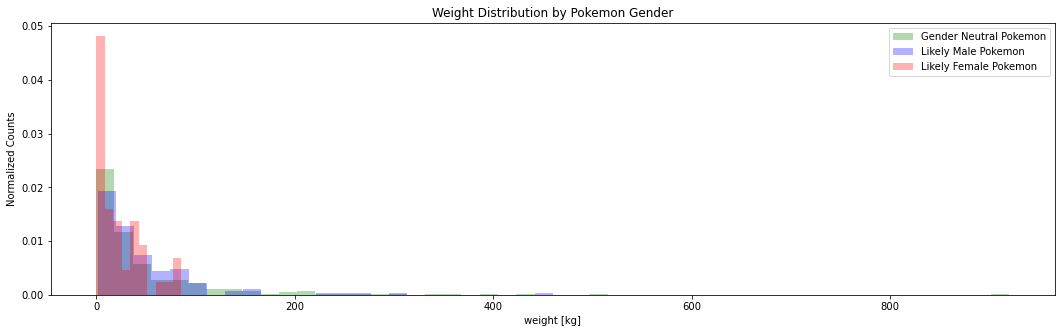

In [27]:
# Some Pokemon do not have listed weights. Let's drop them from the data frames gender_neutral_pokemon, 
# likely_male_pokemon, and likely_female_pokemon:

gn_pokemon = gender_neutral_pokemon.dropna(subset=['weight_kg'])
lm_pokemon = likely_male_pokemon.dropna(subset=['weight_kg'])
lf_pokemon = likely_female_pokemon.dropna(subset=['weight_kg'])

plt.figure(figsize=(18,5))
plt.hist(gn_pokemon.weight_kg, bins = 50, density = True, color = 'green', alpha = 0.3)
plt.hist(lm_pokemon.weight_kg, bins = 25, density = True, color = 'blue',alpha = 0.3)
plt.hist(lf_pokemon.weight_kg, density = True, color = 'red', alpha = 0.3)
plt.legend(['Gender Neutral Pokemon', 'Likely Male Pokemon', 'Likely Female Pokemon'])
plt.title('Weight Distribution by Pokemon Gender')
plt.xlabel('weight [kg]')
plt.ylabel('Normalized Counts')

Well, all three distributions are very skew-right. The long tail of the "gender neutral" Pokemon population is making it hard to see details in the low-mass ... sorry, low <i>weight</i> portion of the weight distributions. (Physics professor in me came out there a little bit.) So below, let's just focus on weights smaller than 300 kg.

Text(0, 0.5, 'Normalized Counts')

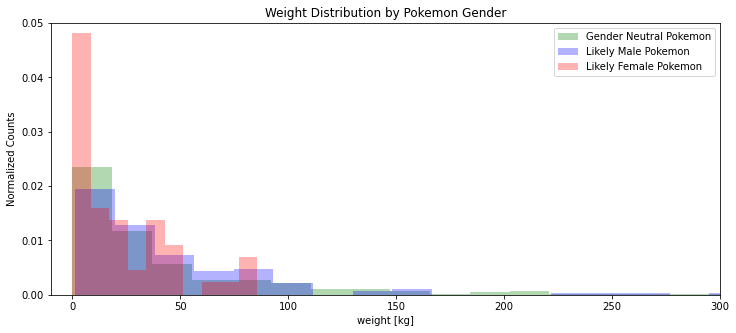

In [28]:
plt.figure(figsize=(12,5))
plt.hist(gn_pokemon.weight_kg, bins = 50, density = True, color = 'green', alpha = 0.3)
plt.hist(lm_pokemon.weight_kg, bins = 25, density = True, color = 'blue', alpha = 0.3)
plt.hist(lf_pokemon.weight_kg, density = True, color = 'red', alpha = 0.3)
plt.axis([-10,300,0.00,0.05])
plt.legend(['Gender Neutral Pokemon', 'Likely Male Pokemon', 'Likely Female Pokemon'])
plt.title('Weight Distribution by Pokemon Gender')
plt.xlabel('weight [kg]')
plt.ylabel('Normalized Counts')

The shape of the normalized weight distributions of "gender neutral" and likely male Pokemon are largely the same. The normalized weight distribution of likely female is different. It's much more sharply peaked, and its tail is much shorter. However, the overall shape of the disributions from 20 kg or so out until 100 kg or so is largely the same.

But can we do better than a visual analysis of the normalized weight distributions? Can we investigate whether or not it is likely that these samples of Pokemon weights are drawn from the same distribution? To that end, let's try to perform Kolmogorov-Smirnov tests on the distributions, pairwise. Our null hypothesis will be that "gender neutral" Pokemon weights and likely male Pokemon weights are drawn from the same distribution; similarly for likely male/likely female, and "gender neutral"/likely female. I'll use the SciPy function ks_2samp to carry out the tests. Let's set our threshhold for rejecting the null hypothesis: I know it's convention to take a p-value of 0.05 (2 sigma) to indicate significance, but I don't want to go all the way out to 3 sigma (p-value of 0.003), so let's go to 2.5 sigma (p-value of 0.013). I will reject the null hypothesis of the p-value comes in at less than 0.013. 

In [29]:
from scipy.stats import ks_2samp

ksstat1, pval1 = ks_2samp(gn_pokemon.weight_kg, lm_pokemon.weight_kg)
print(pval1)
ksstat2, pval2 = ks_2samp(lm_pokemon.weight_kg, lf_pokemon.weight_kg)
print(pval2)
ksstat3, pval3 = ks_2samp(gn_pokemon.weight_kg, lf_pokemon.weight_kg)
print(pval3)

0.025687696379429803
0.0024254230968904222
0.07421804889198103


Well, if I've gotten my statistical test right -- and I will fully admit that I have a lot to learn about hypothesis testing -- it looks as though the weight distributions of likely female Pokemon <i>is</i> significantly different than that of likely male Pokeman; the p-value comes in at less than 0.013, which was my threshhold for rejection. If I was going with the standard p-value of 0.05, the likely male weight distribution would be different than that of "gender neutral" Pokeman, but I'm not, so given my a priori chosen threshhold I cannot reject the null hypothesis for this case. It's clear that, whether you consider my threshhold or the standard one, the weight distributions of "gender neutral" Pokeman and likely female Pokeman are not significantly different. 

So I can conclude that the weight distribution of likely female Pokeman is different than that of likely male Pokeman, which was sort of my initial question. From the shapes of the distributions, it looks as though likely male Pokeman are indeed more likely to have bigger weights than likely female Pokeman. Comparing with gender neutral Pokeman was kind of a bonus.

Oh, I also wanted to know about male vs. female heights, right? Let's do that too. I will again need to be careful about NaNs for height, as some Pokeman in the full data set do not have a recorded height, and will again be plotting normalized histograms.

Text(0, 0.5, 'Normalized Counts')

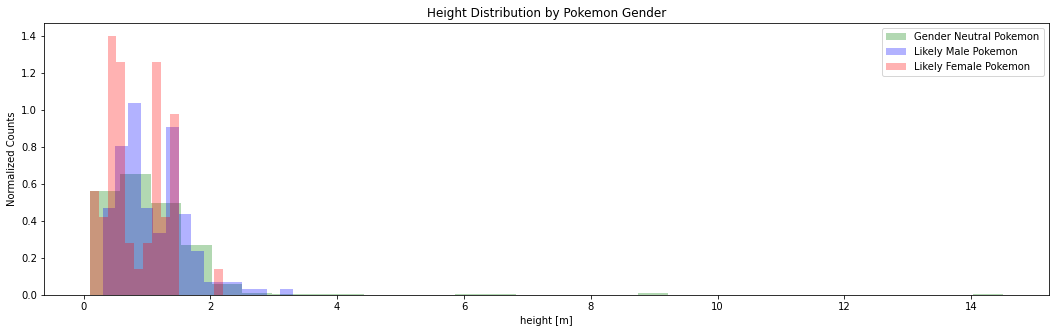

In [30]:
genneu_pokemon = gender_neutral_pokemon.dropna(subset=['height_m'])
likema_pokemon = likely_male_pokemon.dropna(subset=['height_m'])
likefe_pokemon = likely_female_pokemon.dropna(subset=['height_m'])

plt.figure(figsize=(18,5))
plt.hist(gn_pokemon.height_m, bins = 30, density = True, color = 'green', alpha = 0.3)
plt.hist(lm_pokemon.height_m, bins = 15, density = True, color = 'blue', alpha = 0.3)
plt.hist(lf_pokemon.height_m, bins = 15, density = True, color = 'red', alpha = 0.3)
plt.legend(['Gender Neutral Pokemon', 'Likely Male Pokemon', 'Likely Female Pokemon'])
plt.title('Height Distribution by Pokemon Gender')
plt.xlabel('height [m]')
plt.ylabel('Normalized Counts')

Now this is very interesting! Both the likely female and likely male Pokemon height distributions seem to be bimodal! Not so for "gender neutal" Pokemon. Again, let's ignore the extremely long tail of the "gender neutral" Pokemon height distribution and focus on the "short end" of the spectrum:

Text(0, 0.5, 'Normalized Counts')

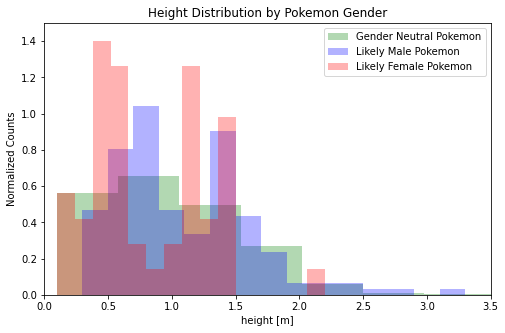

In [31]:
plt.figure(figsize=(8,5))
plt.hist(gn_pokemon.height_m, bins = 30, density = True, color = 'green', alpha = 0.3)
plt.hist(lm_pokemon.height_m, bins = 15, density = True, color = 'blue', alpha = 0.3)
plt.hist(lf_pokemon.height_m, bins = 15, density = True, color = 'red', alpha = 0.3)
plt.axis([0,3.5,0.00,1.5])
plt.legend(['Gender Neutral Pokemon', 'Likely Male Pokemon', 'Likely Female Pokemon'])
plt.title('Height Distribution by Pokemon Gender')
plt.xlabel('height [m]')
plt.ylabel('Normalized Counts')

Not only are the likely female and likely male distributions bimodal, but the first peak of the likely male Pokemon distribution is offset to bigger heights compared to the first peak of the likely female distribution. The differences between these two distributions and the "gender neutral" one is pretty clear.

Let's again run K-S tests, pairwaise, on these disributions. I'm thinking that a K-S test is suited to biomodal distributions, based on the descriptions I've seen of what a K-S test is doing, but I am happy to be corrected about this! Assuming that it is appropriate to run K-S tests, and keeping the same null hypothesis rejection criterion of a p-value of 0.013, let's see what we get:

In [32]:
ksstat4, pval4 = ks_2samp(genneu_pokemon.height_m, likema_pokemon.height_m)
print(pval4)
ksstat5, pval5 = ks_2samp(likema_pokemon.height_m, likefe_pokemon.height_m)
print(pval5)
ksstat6, pval6 = ks_2samp(genneu_pokemon.height_m, likefe_pokemon.height_m)
print(pval6)

0.1826900636101314
0.011371779454472986
0.16731231846236116


Whelp, if it is the appropriate hypothesis test to be doing, it definitely highlights why visual comparisons can be misleading! According to the K-S tests run, both the likely male and likely female height disbributions are not significantly different from the "gender neutral" one. However, the likely male distribution <i>is</i> significantly different than the female one, although just barely given the threshhold I set.

Thus I ultimately conclude that the weights <b>and</b> heights of likely male Pokemon are significantly different than those of likely female Pokemon. It appears as though likely male Pokemon are more likely to have a bigger weight and a bigger height than likely female Pokemon.

# Question #6: Height/Weight correlation

That was fairly illumanitive, and it leads naturally into a broader question: Is there a correlation between a Pokemon's weight and its height, regardless of its gender? Let's investigate this. Again, we will need to be careful of NaN values in weight and height.

Text(0, 0.5, 'weight [kg]')

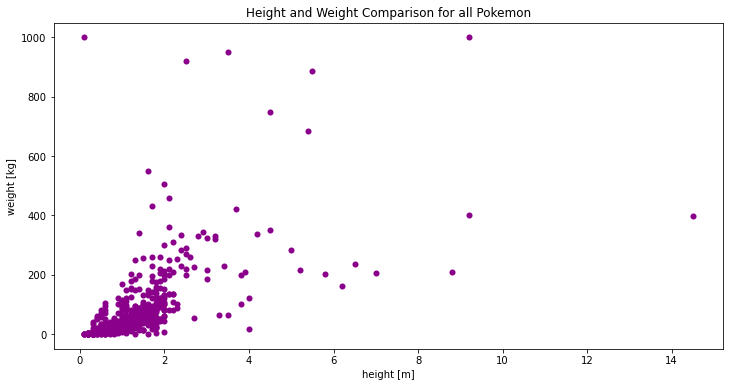

In [33]:
pokemon_wh = pokemon.dropna(subset=['weight_kg','height_m'])

plt.figure(figsize=(12,6))
plt.scatter(pokemon_wh.height_m, pokemon_wh.weight_kg, color = 'darkmagenta', linewidths = 0.05)
plt.title('Height and Weight Comparison for all Pokemon')
plt.xlabel('height [m]')
plt.ylabel('weight [kg]')

That's quite a spread. Generally speaking, it looks as though the bigger the height, the larger the mass -- sorry, <i>weight</i> -- of the Pokemon. But that is very generally speaking: obviously, there are some short Pokemon with big weights, and some tall Pokemon with small weights. The overall trend in the data is that it slopes upward. 

But again, we should be quantitative about this. Is there a way to see if there is a significant correlation between a Pokemon's height and its weight? Doing a brief bit of research with Google (which I used to call "asking Dr. Google" in my lecture classes), it looks as though the most common correlation statistic used is the Pearson correlation coefficient -- the good old "r" value that my lab students used to erroneously report as the uncertainty in the slope of a linear regression -- which measures the linear correlation between two variables. However, the data don't look linear to me at all, so I think the more appropriate test might be the Spearman's rank correlation, which according to Wikipedia "assesses how well the relationship between two variables can be described using a monotonic function." (source: https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) The latter is what I belive is more appropriate for the data, but I suppose for metaphorical stuffies and giggles I can find the Pearson correlation too. For both cases, SciPy has me covered for functions to run the appropriate test.

In [34]:
from scipy.stats import pearsonr, spearmanr

r_value, p_val_of_r = pearsonr(pokemon_wh.height_m, pokemon_wh.weight_kg)
s_value, p_val_of_s = spearmanr(pokemon_wh.height_m, pokemon_wh.weight_kg)

print(r_value)
print(s_value)

0.6265511437853197
0.836589619222317


Confirming my suspicions, that data ain't exactly linear. However, the Pearson r-coefficient is 0.63, implying a positive correlation between Pokemon height and weight. The correlation is a bit stronger when considering the Spearman rank-order coefficient, perhaps because it does not assume that the data are normally distributed. To wit: <i>Are</i> these data normally distributed? Let's have a look. Side-by-side, of coure, because the horizontal axes of the plots are different; I can't "get away" with putting them on the same plot.

Text(0.5, 0.98, 'Pokeman Height and Weight Distributions for All Pokemon')

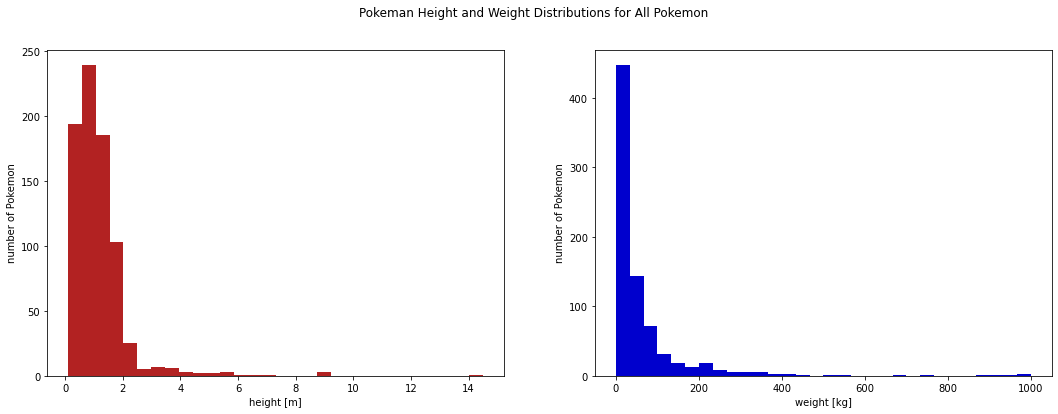

In [35]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.xlabel('height [m]')
plt.ylabel('number of Pokemon')
plt.hist(pokemon_wh.height_m, bins = 30, color = 'firebrick')
plt.subplot(1,2,2)
plt.xlabel('weight [kg]')
plt.ylabel('number of Pokemon')
plt.hist(pokemon_wh.weight_kg, bins = 30, color = 'mediumblue')
plt.suptitle('Pokeman Height and Weight Distributions for All Pokemon')

Nope, those ain't Gaussian distributions. So the Spearman rank-order test was indeed the better test to run. This seems to indicate is that there is some monotonic relationship between a Pokemon's height and its weight, but that relationship isn't perfectly linear. However, there does seem to be a positive correlation between height and weight: the bigger the height, the bigger the weight (generally speaking).

So to summarize: there is a correlation between Pokemon height and weight, but it is not a linear correlation. The general trend is the expected one: the taller the Pokemon, the bigger its weight.

# Question #7: Attack, Defense, and HP

I'm on a bit of a roll with plotting things, so I'll keep it going by looking at the combat side of Pokemon games. Though it's not a big part of the way I currently play Pokemon Go, traditionally in Pokemon games combat between teams of Pokemon is an important part of the game. Pokemon get more experienced with each battle, and have a certain amount of health (called "HP" in game) which determines how long they can stay in a battle. If a Pokemon's HP drops to zero during a battle, they "faint," and cannot engage in any more attacks. There's a somewhat complicated system to determine how much damage one Pokemon will do to another in battle, which depends on experience/level, type, items used as debuffs, and other factors, but I'm not going to attempt to get into all of those details here. Rather, I'd like to investigate some broad strokes: given a Pokemon's base attack and base defense, is there a correlation between the two variables? Is there a correlation between HP and base attack? Or between HP and base defense? This could help a Pokemon player decide how to group Pokemon together to be more effective in battle.

First let's look at a scatter plot of base attack and base defense. Fortunately, all Pokemon in the Pokedex have these stats listed, so I do not need to worry about NaN values.

Text(0, 0.5, 'base defense points')

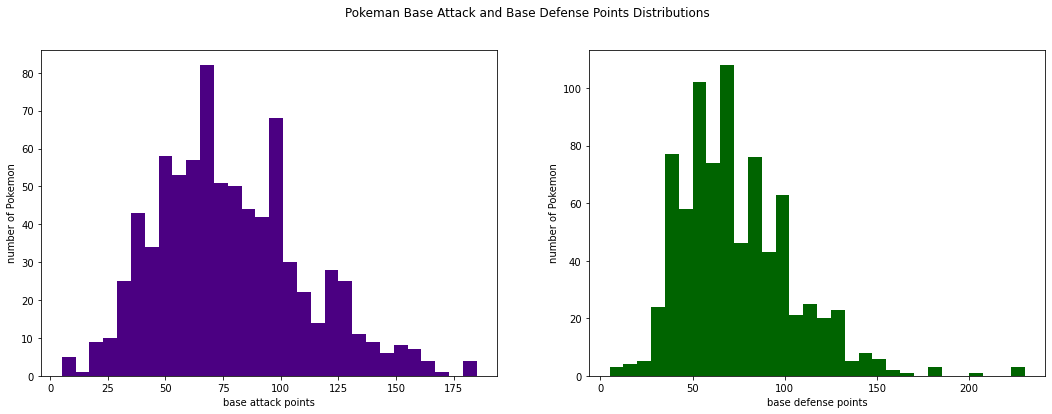

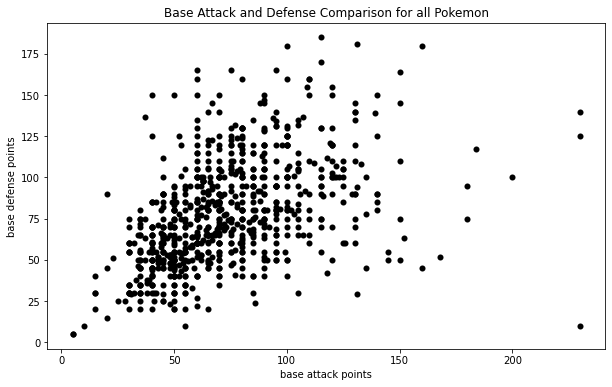

In [36]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.xlabel('base attack points')
plt.ylabel('number of Pokemon')
plt.hist(pokemon.attack, color = 'indigo', bins = 30)
plt.subplot(1,2,2)
plt.xlabel('base defense points')
plt.ylabel('number of Pokemon')
plt.hist(pokemon.defense, color = 'darkgreen', bins = 30)
plt.suptitle('Pokeman Base Attack and Base Defense Points Distributions')

plt.figure(figsize=(10,6))
plt.scatter(pokemon.defense, pokemon.attack, color = 'black', linewidths = 0.05)
plt.title('Base Attack and Defense Comparison for all Pokemon')
plt.xlabel('base attack points')
plt.ylabel('base defense points')

That looks a bit more linear to my eye than the height vs. weight scatter plot, but again the spread is pretty big. Let's run both a Pearson r-correlation test and a Spearman rank-order correlation test on this data:

In [37]:
r_val1, p_val_11 = pearsonr(pokemon.attack, pokemon.defense)
s_val1, p_val_12 = spearmanr(pokemon.attack, pokemon.defense)

print(r_val1)
print(s_val1)

0.4689149139189304
0.5313282131279473


Both test indicates that this data is even less linear than the height vs. weight scatter plot. Yet another instance in which just a visual summary of what the plot looks like can be deceiving!

Now let's look at HP and base attack:

Text(0, 0.5, 'health points')

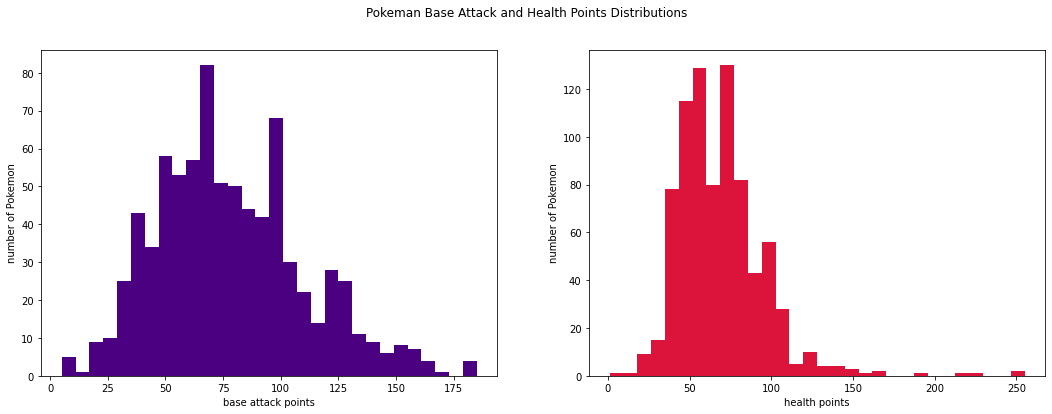

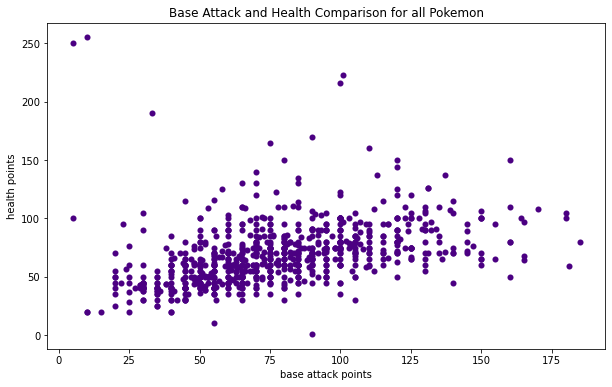

In [38]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.xlabel('base attack points')
plt.ylabel('number of Pokemon')
plt.hist(pokemon.attack, color = 'indigo', bins = 30)
plt.subplot(1,2,2)
plt.xlabel('health points')
plt.ylabel('number of Pokemon')
plt.hist(pokemon.hp, color = 'crimson', bins = 30)
plt.suptitle('Pokeman Base Attack and Health Points Distributions')

plt.figure(figsize=(10,6))
plt.scatter(pokemon.attack, pokemon.hp, color = 'indigo', linewidths = 0.05)
plt.title('Base Attack and Health Comparison for all Pokemon')
plt.xlabel('base attack points')
plt.ylabel('health points')

The distribution of base attack points seems to follow a Poisson distribution, whereas the distribution of health points seems to be fairly normally distributed; that is to say, the health points distribution seems to follow a Gaussian curve. 

The scatter in the scatter plot is pretty low so my eye tells me that the data is pretty linear. However, because both distributions seem to be normal-ish, the Pearson r-correlation test should give a pretty robust result.

In [39]:
r_val2, p_val_21 = pearsonr(pokemon.attack, pokemon.hp)
s_val2, p_val_22 = spearmanr(pokemon.attack, pokemon.hp)

print(r_val2)
print(s_val2)

0.4106157893065075
0.5612065821254808


Nope! Not very linear at all.

What about HP and base defense?

Text(0, 0.5, 'health points')

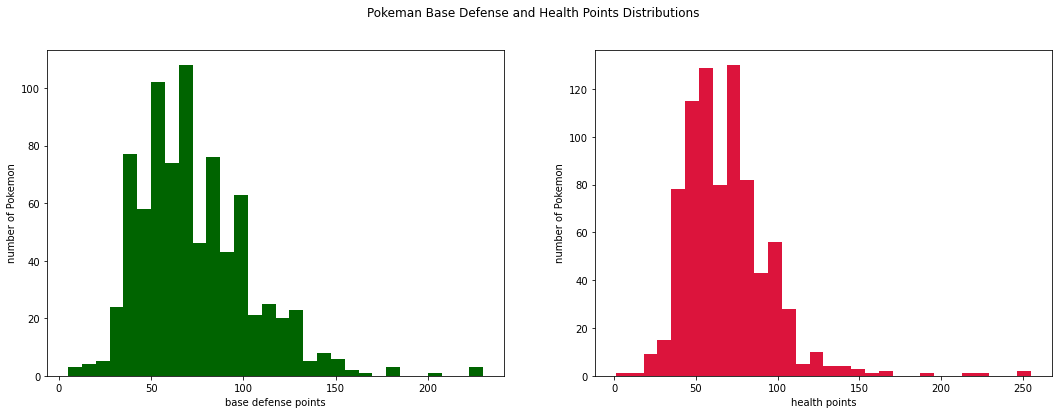

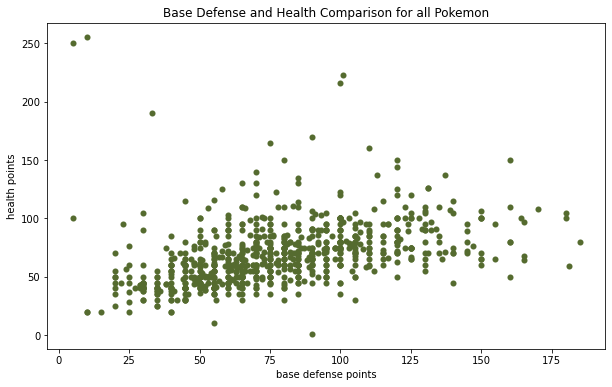

In [40]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.xlabel('base defense points')
plt.ylabel('number of Pokemon')
plt.hist(pokemon.defense, color = 'darkgreen', bins = 30)
plt.subplot(1,2,2)
plt.xlabel('health points')
plt.ylabel('number of Pokemon')
plt.hist(pokemon.hp, color = 'crimson', bins = 30)
plt.suptitle('Pokeman Base Defense and Health Points Distributions')

plt.figure(figsize=(10,6))
plt.scatter(pokemon.attack, pokemon.hp, color = 'darkolivegreen', linewidths = 0.05)
plt.title('Base Defense and Health Comparison for all Pokemon')
plt.xlabel('base defense points')
plt.ylabel('health points')

Same deal as the last time: looks linear to me, but the Pearson r-correlation is probably going to come in at around 0.5 or so.

In [41]:
r_val3, p_val_31 = pearsonr(pokemon.defense, pokemon.hp)
s_val3, p_val_32 = spearmanr(pokemon.defense, pokemon.hp)

print(r_val3)
print(s_val3)

0.24237815560221163
0.4451858128888782


Below 0.5, actually. (I probably shouldn't have been so surprised by this, because if I were to try and draw a line through the data it'd be fairly horizontal, with a slope close to zero.) So, there is a fairly weak correlation between base defense and HP for Pokemon.

So what did we learn from all of this? We've learned that there is a weak correlation between base attack points and base defense points for Pokemon; there is a positive correlation in that the higher the base attack the higher the base defense, but the correlation is not linear. There is a similarly weak correlation between Pokemon base attack points and Pokemon HP, and an even weaker correlation between Pokemon base defense points and Pokemon HP. Since the correlations are fairly weak, this tells me that it's probably best to do individual analysis on the Pokemon in one's Pokedex when assembling teams. This is probably a good practice anyway, given how the attacks of various Pokemon types can be buffed or debuffed when acting on Pokemon of other types.

# Question #8: Are hard to get Pokemon "better"?

Here's a natural question: What makes hard-to-capture Pokemon worth it? Is it limited to the bragging rights of saying that you got lucky and caught one? Or is there some benefit in terms of HP, base attack, or base defense to having a hard-to-catch Pokemon? On a related note, if you snag an easy-to-catch Pokemon, does that mean it's going to have low base attack and/or base defense and/or HP? Let's find out. First, we'll need to divide Pokemon into two categories: hard-to-catch and everything else. I've already plucked off the hardest-to-catch Pokemon, which I operationally defined as a capture rate 30 or below, so now I need to separate out the other Pokemon. I've also already plucked off the easiest-to-catch Pokemon (capture rate 225 or above), so I should have another DataFrame which separates out harder-to-catch Pokemon.

In [42]:
hard_to_catch_pokemon = pokemon[pokemon.capture_rate <= 30]
easier_to_catch_pokemon = pokemon[pokemon.capture_rate > 30]

easy_to_catch_pokemon = pokemon[pokemon.capture_rate >= 225]
harder_to_catch_pokemon = pokemon[pokemon.capture_rate < 225]

Cool. So first let's look at the distributions of HP for hard-to-catch Pokemon vs. easier-to-catch Pokemon, and separately the distributions of easy-to-catch Pokemon vs. harder-to-catch Pokemon. 

Text(0.5, 0.98, 'Pokeman Health Points Distributions by Capture Rate')

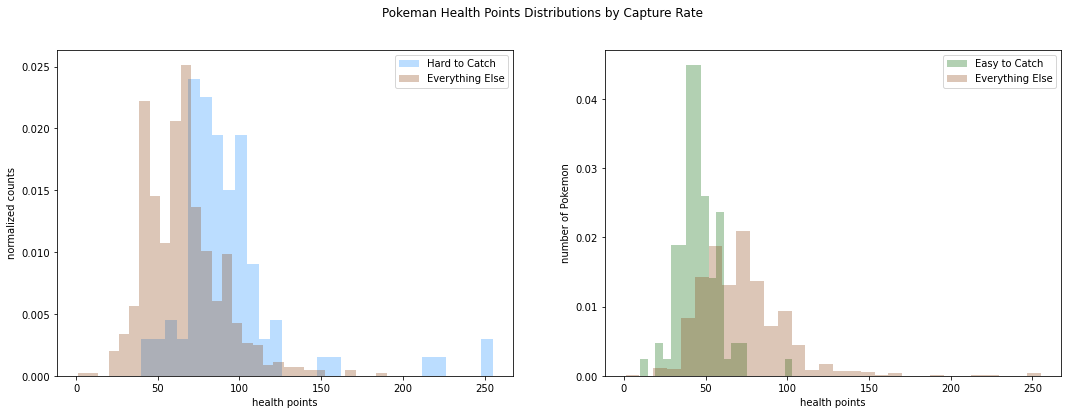

In [43]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.xlabel('health points')
plt.ylabel('normalized counts')
plt.hist(hard_to_catch_pokemon.hp, bins = 30, density = True, color = 'dodgerblue', alpha = 0.3)
plt.hist(easier_to_catch_pokemon.hp, bins = 30, density = True, color = 'saddlebrown', alpha = 0.3)
plt.legend(['Hard to Catch', 'Everything Else'])
plt.subplot(1,2,2)
plt.xlabel('health points')
plt.ylabel('number of Pokemon')
plt.hist(easy_to_catch_pokemon.hp, bins = 20, density = True, color = 'darkgreen', alpha = 0.3)
plt.hist(harder_to_catch_pokemon.hp, bins = 30, density = True, color = 'saddlebrown', alpha = 0.3)
plt.legend(['Easy to Catch', 'Everything Else'])
plt.suptitle('Pokeman Health Points Distributions by Capture Rate')

The distributions of HP for all samples are approximately Gaussian (the hard-to-catch distribution does have a long tail though), and it's clear to see that the peaks of the hard-to-catch and easy-to-catch distributions are noticeably offset from the peaks of the 'everything else' distributions. But does that mean that there is in fact a significant difference? Here definitely I think a K-S test will be very appropriate.

In [44]:
ksstat7, pval7 = ks_2samp(hard_to_catch_pokemon.hp, easier_to_catch_pokemon.hp)
print(pval7)
ksstat8, pval8 = ks_2samp(easy_to_catch_pokemon.hp, harder_to_catch_pokemon.hp)
print(pval8)

4.014293127737e-18
2.122892196073344e-23


Heck yeah, that's significant! I don't care what your <i>a priori</i> p-value cut-off was, there are significant differences between the HP distributions of hard-to-get Pokemon vs. everything else, and between easy-to-get Pokemon and everything else. I'm not going to run the stats on this next statement, but I believe it to be very likely that there would be a significant difference between the HP distributions of hard-to-catch Pokemon and easy-to-catch Pokemon.

So, hard-to-catch Pokemon tend to have bigger HP than all other easier-to-catch Pokemon. Do they also have higher base attack and/or defense?

Text(0.5, 0.98, 'Pokeman Base Attack Points Distributions by Capture Rate')

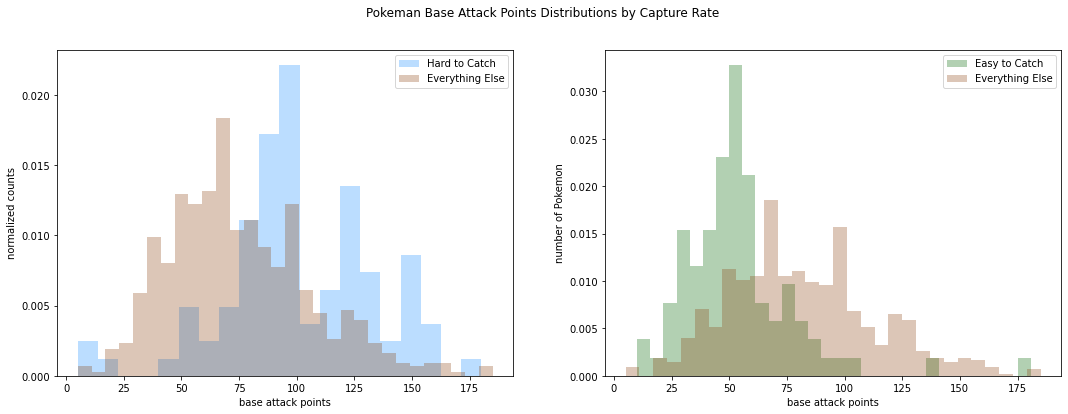

In [45]:
# First look at attack:

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.xlabel('base attack points')
plt.ylabel('normalized counts')
plt.hist(hard_to_catch_pokemon.attack, bins = 20, density = True, color = 'dodgerblue', alpha = 0.3)
plt.hist(easier_to_catch_pokemon.attack, bins = 30, density = True, color = 'saddlebrown', alpha = 0.3)
plt.legend(['Hard to Catch', 'Everything Else'])
plt.subplot(1,2,2)
plt.xlabel('base attack points')
plt.ylabel('number of Pokemon')
plt.hist(easy_to_catch_pokemon.attack, bins = 30, density = True, color = 'darkgreen', alpha = 0.3)
plt.hist(harder_to_catch_pokemon.attack, bins = 30, density = True, color = 'saddlebrown', alpha = 0.3)
plt.legend(['Easy to Catch', 'Everything Else'])
plt.suptitle('Pokeman Base Attack Points Distributions by Capture Rate')

The normalized base attack points distributions for almost all samples are approximately Gaussian, but the distribution of the hard-to-catch Pokemon is likely bi-modal or at worst multi-modal. It is again clear to see that the peaks of the hard-to-catch and easy-to-catch distributions are noticeably offset from the peaks of the 'everything else' distributions. Let's run some K-S tests to make sure those visual differences are in fact siginficant:

In [46]:
ksstat9, pval9 = ks_2samp(hard_to_catch_pokemon.attack, easier_to_catch_pokemon.attack)
print(pval9)
ksstat10, pval10 = ks_2samp(easy_to_catch_pokemon.attack, harder_to_catch_pokemon.attack)
print(pval10)

1.152078432653525e-12
2.2470966059105997e-16


Indeed they are!

Text(0.5, 0.98, 'Pokeman Base Defense Points Distributions by Capture Rate')

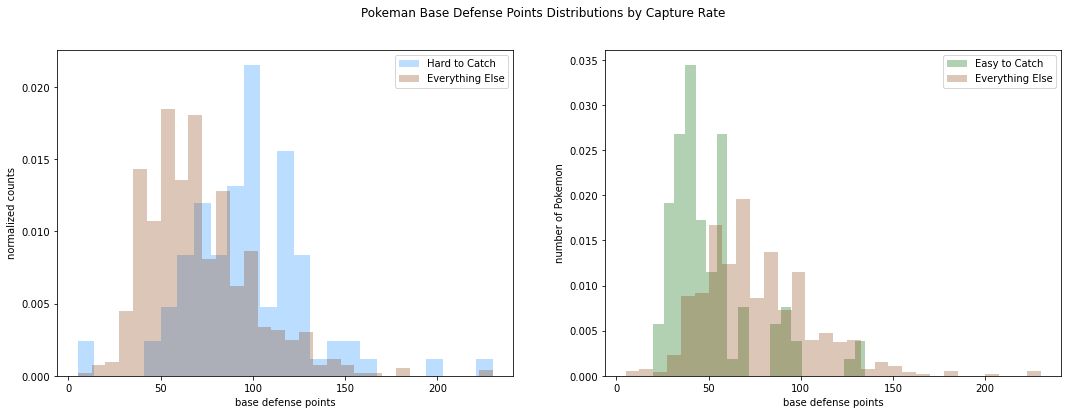

In [47]:
# Now look at defense:

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.xlabel('base defense points')
plt.ylabel('normalized counts')
plt.hist(hard_to_catch_pokemon.defense, bins = 25, density = True, color = 'dodgerblue', alpha = 0.3)
plt.hist(easier_to_catch_pokemon.defense, bins = 30, density = True, color = 'saddlebrown', alpha = 0.3)
plt.legend(['Hard to Catch', 'Everything Else'])
plt.subplot(1,2,2)
plt.xlabel('base defense points')
plt.ylabel('number of Pokemon')
plt.hist(easy_to_catch_pokemon.defense, bins = 20, density = True, color = 'darkgreen', alpha = 0.3)
plt.hist(harder_to_catch_pokemon.defense, bins = 30, density = True, color = 'saddlebrown', alpha = 0.3)
plt.legend(['Easy to Catch', 'Everything Else'])
plt.suptitle('Pokeman Base Defense Points Distributions by Capture Rate')

The normalized base defense points distributions for the "everything else" samples are approximately Gaussian. The base defense points distribution for hard-to-catch Pokemon is very approximately Gaussian (an argument could be made for bi-modal as well), and the easy-to-catch distribution is clearly multi-modal. Yet again, one can readily see that the peaks of the hard-to-catch and easy-to-catch distributions are noticeably offset from the peaks of the 'everything else' distributions. Running some K-S tests ...

In [48]:
ksstat11, pval11 = ks_2samp(hard_to_catch_pokemon.defense, easier_to_catch_pokemon.defense)
print(pval11)
ksstat12, pval12 = ks_2samp(easy_to_catch_pokemon.defense, harder_to_catch_pokemon.defense)
print(pval12)

9.736655925962623e-14
4.440892098500626e-16


So the bottom line is, hard-to-capture Pokemon are in general worth the effort to catch because they tend to have higher HP, higher base attack, and higher base defense than other, easier-to-catch Pokemon. Of course, as an added bonus, there are bragging rights that come with snagging one, but statistically you are likely to get a powerful Pokemon that will help you in battle.

As for easy-to-catch Pokemon ... as you'd expect, they tend to be nothing special. Generally speaking, they have lower HP, lower base attack, and lower base defense than other Pokemon. When you first start out, they are probably your only option to form a team, but when you snag harder-to-catch Pokemon, those easy-to-catch ones will probably cycle out of your battle formation.

# Question #9: Goldilocks Pokemon (not too hard to get, not too "wimpy")

As you might expect, there's a lot to consider as a Pokemon Go player in terms of team build and what Pokemon to go after (should they appear, of course; the game generates Pokemon at random according to some (doubtless proprietary) algorithm, so you're never guarunteed to "see" a Pokemon you "want"). Given that some Pokemon can be "evolved" into others, it makes sense to collect enough easy-to-catch Pokemon to "evolve" them into something better; but Pokemon trainers have limited Pokeballs and limited inventory space, and could very well find a few "better" Pokemon while looking for those easy-to-catch ones, so what other strategies might a trainer develop to build a better team?

Let's investigate one possible strategy: if you want a Pokemon with a high base attack/ base defense/HP value that's not "too" hard to catch, what should you try to capture if it appears?

First, I should define "not too hard to catch." I've already defined "hard to catch" as having a capture rate less than or equal to 30, and "easy to catch" as having a capture rate greater than or equal to 225. The spread of base capture rates was 3 to 255. Being in the middle seems to me to strike a nice balance between not too hard to catch and not very easy to catch, so I will take the middle of the capture range to be "not too hard to catch." I considered a roughly 30 point range in capture rate when defining "hard to catch" and "easy to catch," so I will define a similar range for "not too hard to catch." 

Thus, the capture rate of "not too hard to catch" Pokemon will be centered on (255 - 3)/2, or 126, with +/- 15 on either side (low side 111, high side 141).

In [49]:
not_too_hard_to_catch = pokemon[(pokemon.capture_rate <= 141) & (pokemon.capture_rate >= 111)]

If I am a Pokemon trainer who values base HP when constructing a team, I will want to concentrate on capturing Pokemon with high HP. Which 5 "not too hard to catch" Pokemon have the highest HP?

In [50]:
top_HP_pokemon = not_too_hard_to_catch.sort_values(by = "hp")
top_HP_pokemon = top_HP_pokemon.iloc[0:5]

print(top_HP_pokemon.name)

414       Combee
280       Kirlia
308    Electrike
411        Burmy
450      Skorupi
Name: name, dtype: object


Now, what if I am a trainer who values base attack?

In [51]:
top_attack_pokemon = not_too_hard_to_catch.sort_values(by = "attack")
top_attack_pokemon = top_attack_pokemon.iloc[0:5]

print(top_attack_pokemon.name)

439    Happiny
10     Metapod
664     Spewpa
359     Wynaut
13      Kakuna
Name: name, dtype: object


What if I am a trainer who values base defense?

In [52]:
top_defense_pokemon = not_too_hard_to_catch.sort_values(by = "defense")
top_defense_pokemon = top_defense_pokemon.iloc[0:5]

print(top_defense_pokemon.name)

439     Happiny
227    Houndour
424    Drifloon
319     Wailmer
280      Kirlia
Name: name, dtype: object


The Pokemon "Happiny" tops the "not too hard to catch" list of both base attack and defense, and so might be a good Pokemon to target if your aim is to build a team by looking for the "best" "not too hard to catch" Pokemon.

Finally, if you wanted a "happy medium" between base attack, base defense, and HP, and wanted to concentrate on "not too hard to catch" Pokemon, which Pokemon should you target? Obviously, you'd want fairly high values of all three, but the sorting order would depend on what number you value more than the others. I will assume that you are interested in sorting by attack first, then HP, then defense.

In [53]:
top_allaround_pokemon = not_too_hard_to_catch.sort_values(by = ['attack','defense','hp'])
top_allaround_pokemon = top_allaround_pokemon.iloc[0:5]

print(top_allaround_pokemon.name)

439    Happiny
10     Metapod
664     Spewpa
359     Wynaut
13      Kakuna
Name: name, dtype: object


So there are the top 5 "happy medium" Pokemon, in the "not too hard to catch" category, who have high base attack, base defense, and HP, in that order. 

# Wrapping up

We've done a fair bit of analysis on this data set, so it's good to step back and take a look at the broader picture. What have we learned as a result of our analysis? What recommendations might we make to Pokemon trainers based on the analysis we have done?

We started by investigating which Pokemon were hardest to capture, and which were easiest to capture. We found the names of the 93 hardest-to-catch Pokemon (defined as having capture rate <= 30), and the names of the 91 easiest-to-catch Pokemon (defined as having capture rate >= 225). My personal Pokedex has 2 hard-to-catch Pokemon and 40 easy-to-catch ones. We then learned that there are 588 different classes of Pokemon, most of which contain just a single specimen. However, the "Dragon Pokemon" class is the largest, having 8 Pokemon. There are 70 legendary Pokemon, all but 6 of which are in their own unique class; however, there are 4 "Land Spirit" legendary Pokemon, and 2 "Eon" legendary Pokemon. I don't have any legendary Pokemon in my Pokedex; they may not have been included in Pokemon Go. 

There are 18 different "primary" Pokemon types, with water, normal, and grass-type Pokemon being the most common. Among legendary Pokemon, psychic and dragon are the most common primary types, whereas in my Pokedex normal, grass, and water Pokemon are most common.

Looking at Pokemon gender, there are 98 inherently gender-less Pokemon, 501 "gender neutral" Pokemon which are just as likely to be male as they are female, 149 Pokemon which are likely to be male, and 53 Pokemon which are likely to be female. Pokemon which are likley to be male are more likely to have bigger weights and taller heights than Pokemon which are likely to be female. The heights and weights of "gender neutral" Pokemon do not seem to be significantly different than those of Pokemon likely to be male, or of those Pokemon likely to be female. There is a positive correlation between height and weight, regardless of Pokemon gender, but it is not linear.

Looking at some of the base numbers associated with Pokemon combat, there is a weak positive correlation between base attack and base defense; there is also a weak positive correlation between base attack and HP, and a very weak positive correlation between base defense and HP. Hard-to-catch Pokemon as defined above have significantly higher HP, base attack, and base defense than other Pokemon. Conversely, easy-to-catch Pokemon have significantly lower HP, base attack, and base defense than other Pokemon.

Lastly, we defined a set of "not too hard to catch" Pokemon, and found the top 5 Pokemon in terms of HP, base attack, and base defense of this set. 5 "happy medium" Pokemon, defined as having high base attack and base defense and HP, were also found.

# Limitations 

The preceding analysis certainly has limitations.

First and foremost, the data set considered here contains only Pokemon through generation 7; there are now 8 generations of Pokemon, and this analysis naturally misses that 8th generation. Further, I have made no attempt to wade through the various "against" columns in the data set to better determine how a particular Pokemon will fare in battle against Pokemon of various other types. I have simply considered base attack, base defense, and base health; a deeper analysis would include the various "against" effects. And most importantly, I have not touched the "abilities" column. In reality, a Pokemon's abilities can greatly determine its value in battle; Pokemon with abilities which cause it to miss turns in battle, or be otherwise ineffective, may not be the most ideal Pokemon to have on a battle team; conversely, those which have fast offensive attacks, or are unusually effective against the Pokemon types of the opposing team, may be better choices. 

# Credits

This data set was downloaded from Kaggle.com, and more speciifically from the URL https://www.kaggle.com/rounakbanik/pokemon. The individual who compiled the data set, Rounak Banik, scraped the data from http://serebii.net/. The data set was released under the CC0 public domain license (https://creativecommons.org/publicdomain/zero/1.0/) and was last updated in September 2017. 